In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler

path = './in/creditcard.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Missing values

There isn't missing data, in case exist, we can replace some missing values with an imputation method.

<AxesSubplot:>

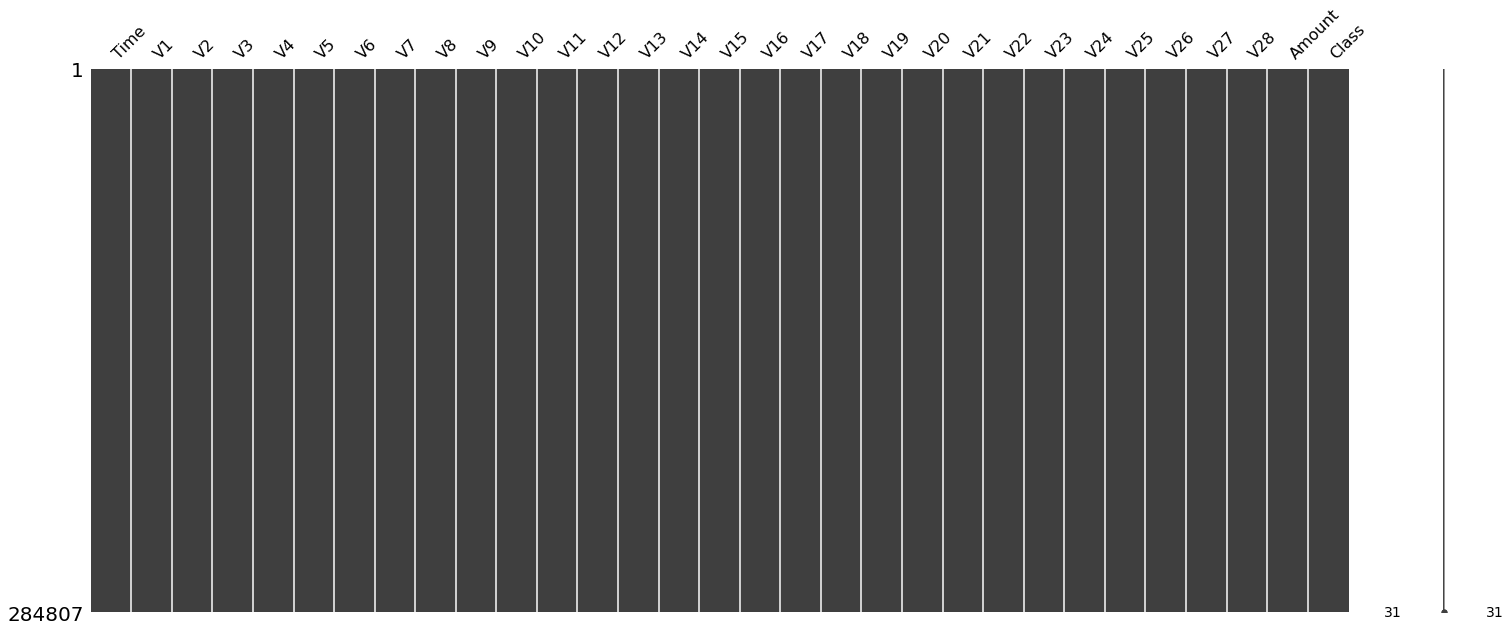

In [2]:
import missingno as msno
msno.matrix(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.drop('Time', axis = 1, inplace = True) #Drop irrelevant features

# Balanced dataset?

It isn't, just 0.17% of data is a fraudulent transaction.

The dataset is completely unbalanced.

In [5]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Outliers

In [6]:
X = df.iloc[:,0:29]
y = df.iloc[:,-1]

In [7]:
columns = X.columns.values.tolist()

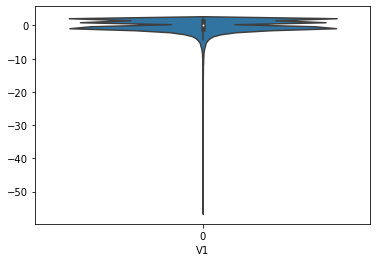

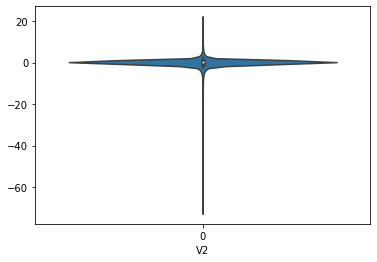

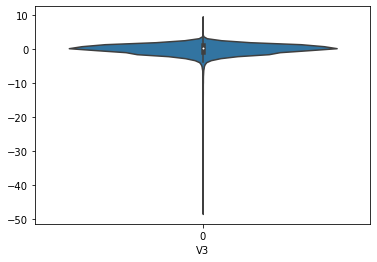

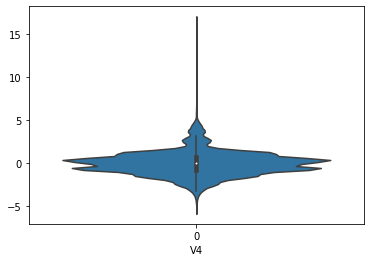

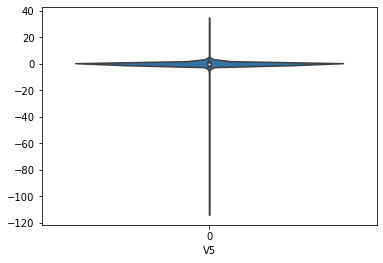

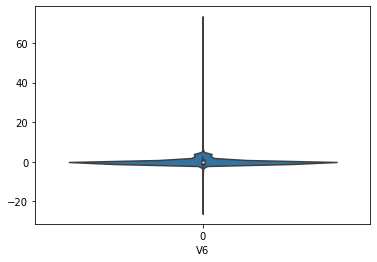

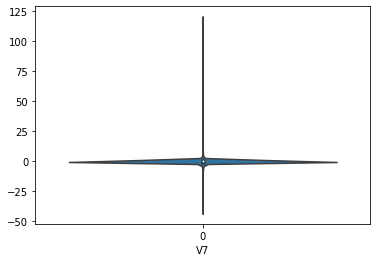

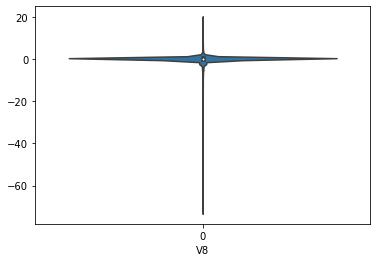

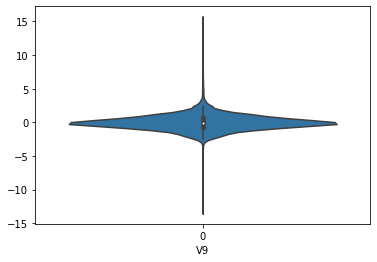

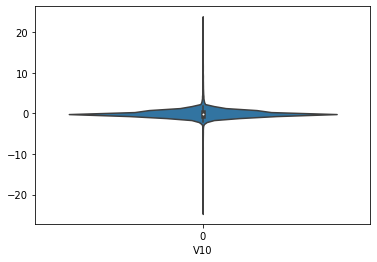

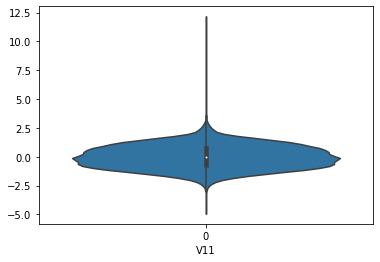

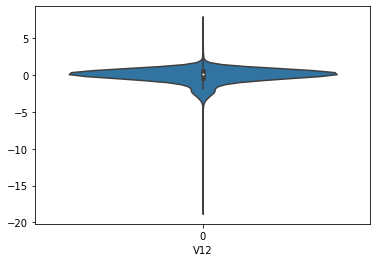

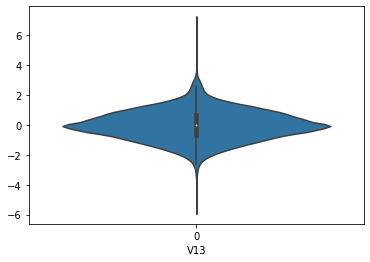

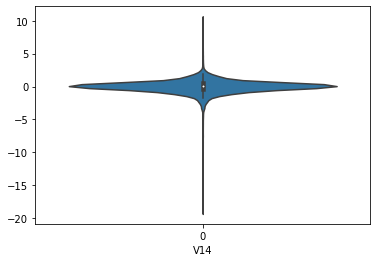

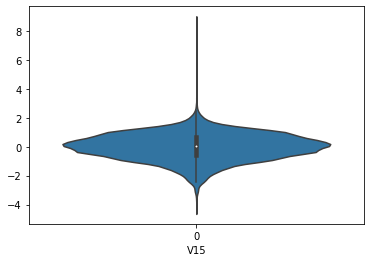

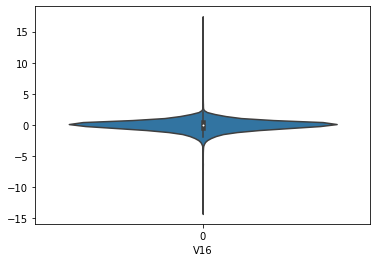

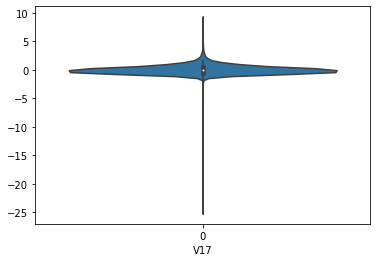

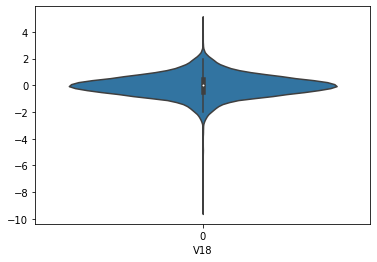

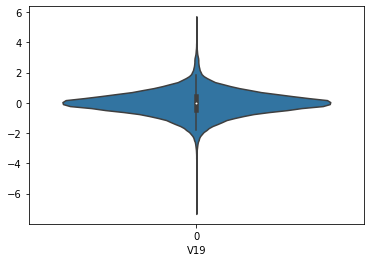

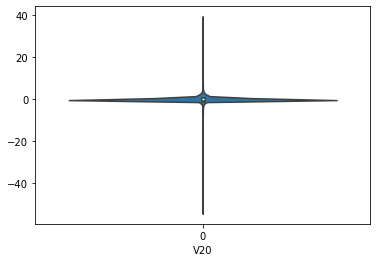

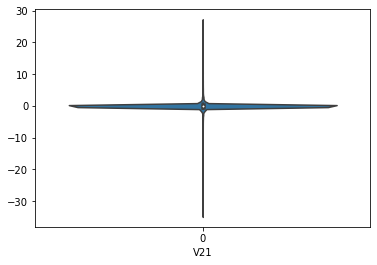

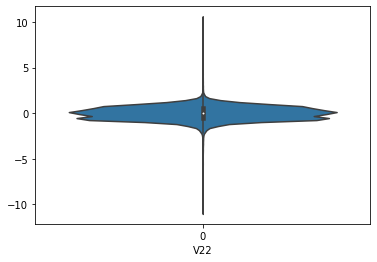

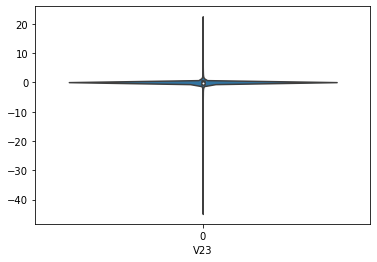

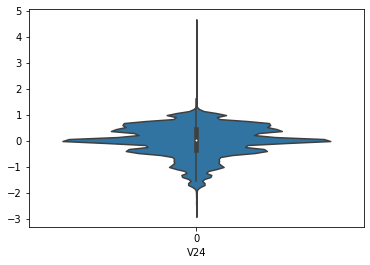

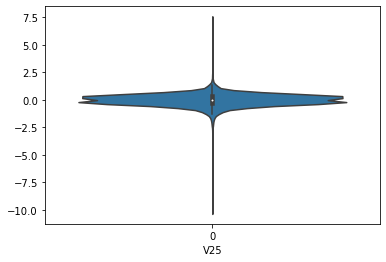

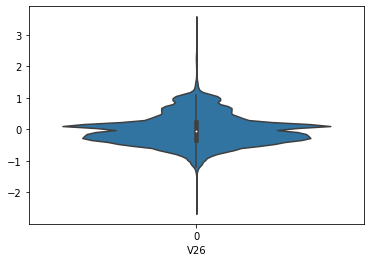

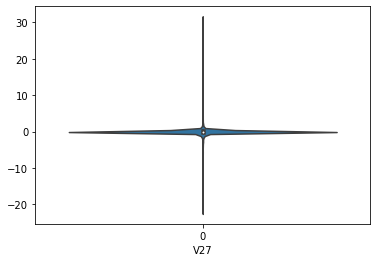

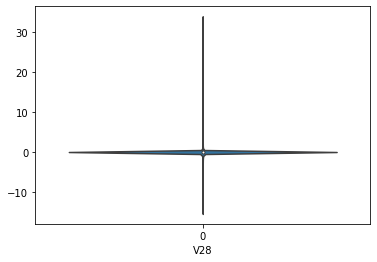

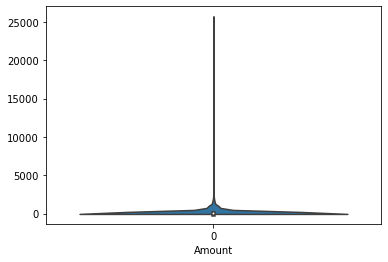

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

for columna in columns:
  if type(df[columna][0]) == str:
    continuse
  else:
    sns.violinplot(data = df[columna])
    plt.xlabel(f"{columna}")
    plt.show()

In [9]:
from scipy import stats

for column in columns:
  if df[column].dtype != object:
    n_outliers = list((np.abs(stats.zscore(df[column], nan_policy = 'omit')) > 3)).count(True)
    print(f"La columna {column} tiene {n_outliers} outliers")

La columna V1 tiene 3701 outliers
La columna V2 tiene 4318 outliers
La columna V3 tiene 1987 outliers
La columna V4 tiene 3094 outliers
La columna V5 tiene 2945 outliers
La columna V6 tiene 4652 outliers
La columna V7 tiene 3401 outliers
La columna V8 tiene 4221 outliers
La columna V9 tiene 2293 outliers
La columna V10 tiene 3488 outliers
La columna V11 tiene 684 outliers
La columna V12 tiene 3393 outliers
La columna V13 tiene 1192 outliers
La columna V14 tiene 3380 outliers
La columna V15 tiene 1254 outliers
La columna V16 tiene 2077 outliers
La columna V17 tiene 2515 outliers
La columna V18 tiene 1685 outliers
La columna V19 tiene 3399 outliers
La columna V20 tiene 4645 outliers
La columna V21 tiene 4064 outliers
La columna V22 tiene 1222 outliers
La columna V23 tiene 3364 outliers
La columna V24 tiene 657 outliers
La columna V25 tiene 2809 outliers
La columna V26 tiene 1047 outliers
La columna V27 tiene 4771 outliers
La columna V28 tiene 3264 outliers
La columna Amount tiene 4076 ou

In [10]:
df_so = df.copy()

for columna in columns:
  if df_so[columna].dtype != object:
    condicion = np.abs(stats.zscore(df_so[columna], nan_policy = 'omit')) > 3
    lista_indices = df_so[condicion].index.tolist()
    df_so.drop(df.index[lista_indices], axis = 0, inplace = True)
    df_so.reset_index()
    
df_so.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000,...,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000,207614.000000
mean,0.494221,0.070645,0.142739,-0.040189,-0.037768,-0.183933,0.010321,0.089756,-0.050406,-0.037254,...,-0.027537,-0.010712,-0.001281,-0.003353,0.011636,-0.004872,0.018596,0.011714,45.348502,0.000135
std,1.285020,0.840741,1.242499,1.227082,0.914378,0.953731,0.713150,0.396662,0.945389,0.716630,...,0.250872,0.670345,0.211256,0.568804,0.439604,0.454060,0.158369,0.101000,61.483541,0.011612
min,-5.665908,-3.698634,-3.893373,-4.110377,-3.277650,-3.396002,-2.479150,-1.929671,-3.023450,-2.432426,...,-0.884601,-2.035538,-0.776244,-1.757035,-1.395266,-1.404504,-0.666765,-0.356585,0.000000,0.000000
25%,-0.626990,-0.485396,-0.707176,-0.799891,-0.639169,-0.782408,-0.499044,-0.166708,-0.613196,-0.479962,...,-0.222442,-0.557129,-0.134865,-0.345835,-0.297775,-0.316136,-0.056657,-0.045803,4.990000,0.000000
50%,1.009537,0.059336,0.263176,0.005936,-0.086176,-0.354375,0.042351,0.025278,-0.068951,-0.095730,...,-0.039415,-0.011911,-0.006851,0.037134,0.020008,-0.044177,0.002851,0.009787,19.120000,0.000000
75%,1.692247,0.709220,1.061500,0.678509,0.478719,0.176860,0.513215,0.271940,0.516127,0.340841,...,0.155168,0.499878,0.127813,0.414084,0.340585,0.213941,0.074833,0.055398,59.880000,0.000000
max,2.454930,3.777942,4.029428,4.072497,3.322811,3.583308,2.551787,2.061555,3.020124,2.375272,...,0.858531,2.031049,0.769830,1.299212,1.391304,1.411907,0.667249,0.371200,317.770000,1.000000


In [11]:
df_so["Class"].value_counts()

0    207586
1        28
Name: Class, dtype: int64

Deleting the outliers the unbalance is even bigger, causing the infeasibility removing outliers.

# Dimentional Analisis

To check if we have more features that are necessary, we must calculate the correlation between features

<AxesSubplot:>

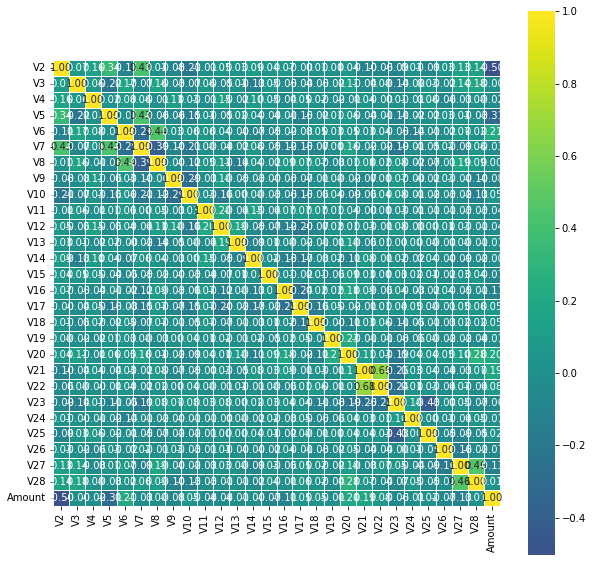

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[columns[1:]].corr(method = "spearman"), vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cmap = 'viridis')

In [13]:
corr3 = abs(df[columns[1:]].corr(method = "kendall"))
corr3.to_excel('Correlation3abs.xlsx')
corr3

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V2,1.000000,0.048478,0.107351,0.253497,0.075821,0.329402,0.001017,0.074310,0.160066,0.008823,...,0.038089,0.069072,0.038547,0.068234,0.008315,0.053289,0.018293,0.089359,0.094863,0.352372
V3,0.048478,1.000000,0.041763,0.151736,0.121996,0.052368,0.119801,0.020508,0.049982,0.037292,...,0.074335,0.024427,0.008200,0.095904,0.003215,0.015695,0.013335,0.103922,0.142038,0.000098
V4,0.107351,0.041763,1.000000,0.009641,0.053217,0.036705,0.005311,0.075229,0.027584,0.007886,...,0.009787,0.027596,0.001564,0.005974,0.005360,0.043350,0.038064,0.015381,0.008566,0.015450
V5,0.253497,0.151736,0.009641,1.000000,0.013118,0.336956,0.044898,0.042921,0.108346,0.007115,...,0.041197,0.028848,0.008946,0.076579,0.023867,0.011553,0.019354,0.005330,0.025514,0.215772
V6,0.075821,0.121996,0.053217,0.013118,1.000000,0.204163,0.346100,0.018539,0.043496,0.034803,...,0.036057,0.024642,0.029005,0.035828,0.102781,0.007312,0.015464,0.053432,0.014661,0.140144
V7,0.329402,0.052368,0.036705,0.336956,0.204163,1.000000,0.279022,0.075571,0.146456,0.002275,...,0.114488,0.016099,0.017173,0.130475,0.008456,0.031165,0.008680,0.077099,0.039180,0.022815
V8,0.001017,0.119801,0.005311,0.044898,0.346100,0.279022,1.000000,0.001677,0.083521,0.032801,...,0.004474,0.055980,0.014940,0.051287,0.019570,0.051006,0.005470,0.144435,0.068582,0.003492
V9,0.074310,0.020508,0.075229,0.042921,0.018539,0.075571,0.001677,1.000000,0.204038,0.021900,...,0.016940,0.045830,0.000916,0.051102,0.001078,0.015524,0.023429,0.000577,0.070596,0.051887
V10,0.160066,0.049982,0.027584,0.108346,0.043496,0.146456,0.083521,0.204038,1.000000,0.022676,...,0.061352,0.031408,0.027517,0.052697,0.005538,0.010447,0.018037,0.013482,0.094223,0.037835
V11,0.008823,0.037292,0.007886,0.007115,0.034803,0.002275,0.032801,0.021900,0.022676,1.000000,...,0.028554,0.000573,0.000701,0.020922,0.001090,0.003512,0.004175,0.017527,0.018437,0.029616


Trying an easier visualization of features, I decided to use Excel to assign colors to de different correlations but, there are no relevant correlations between features justifying the use of PCA to reduce the dimension of the features.

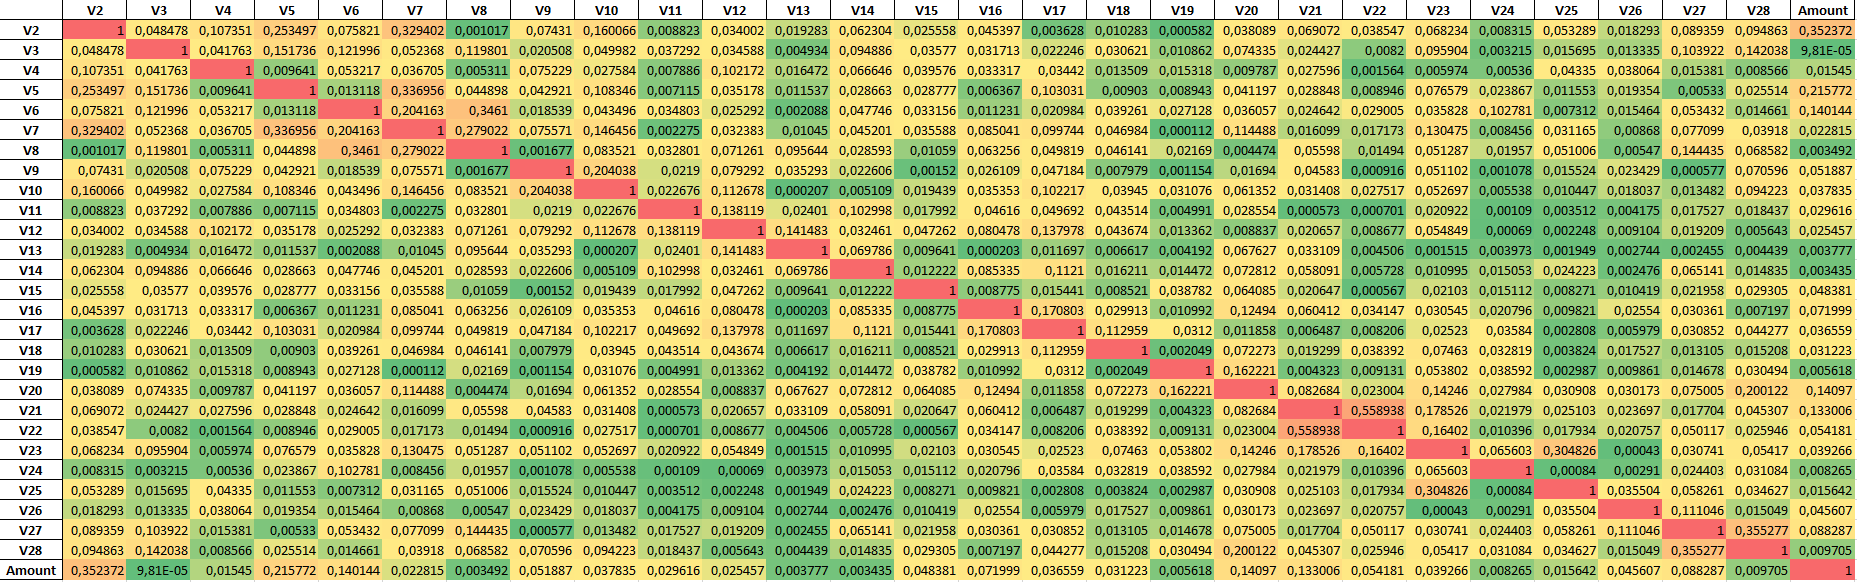

Is necesary to scale the dataset because some features are in a different scale.